In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import  matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame
from numpy.random import randn
import scipy as sp
from scipy import stats
sns.set_style('whitegrid')
%matplotlib inline

In [38]:
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime

In [36]:
techlist=['AAPL','GOOG','MSFT','AMZN']
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [42]:
for stock in techlist:
    globals()[stock]=yf.download(stock,start=start,end=end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [44]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-23,150.089996,150.339996,147.240005,149.399994,148.606781,48394200
2023-02-24,147.110001,147.190002,145.720001,146.710007,145.931061,55469600
2023-02-27,147.710007,149.169998,147.449997,147.919998,147.134644,44998500
2023-02-28,147.050003,149.080002,146.830002,147.410004,146.627350,50547000
2023-03-01,146.830002,147.229996,145.009995,145.309998,144.538513,55479000


In [45]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,178.591628,180.073572,177.285714,178.797540,178.257703,5.670749e+07
std,12.543993,12.384544,12.475510,12.401273,12.542903,1.610171e+07
min,144.380005,146.710007,143.899994,145.309998,144.538513,1.460820e+07
25%,171.962505,173.499996,170.805004,172.070007,171.484463,4.678918e+07
50%,179.915001,181.155006,177.869995,179.800003,179.213669,5.304980e+07
75%,189.277496,189.990005,187.652500,189.317501,188.879906,6.203525e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.282567e+08


In [46]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-02-23 to 2024-02-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


<Axes: xlabel='Date'>

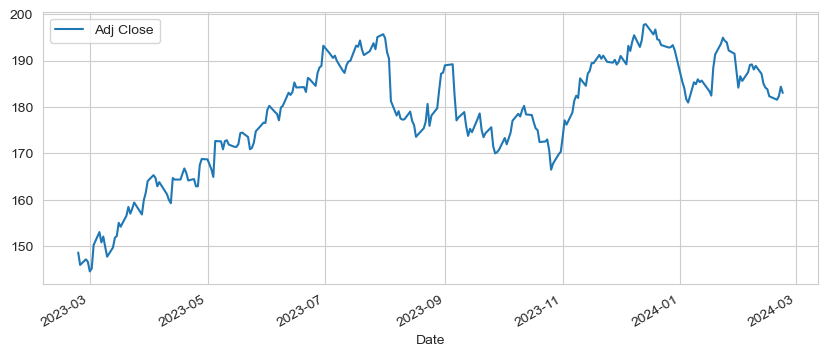

In [47]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

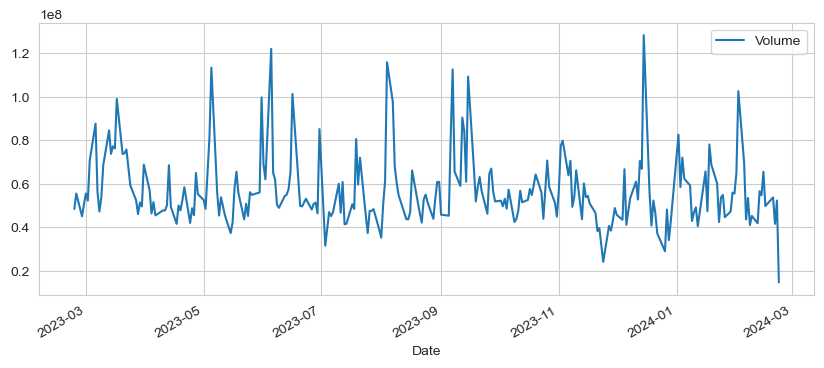

In [48]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [57]:
ma_day=[50,100,200]
for ma in ma_day:
    columnName = "%s days MA"%str(ma)

    AAPL[columnName]=pd.DataFrame.rolling(AAPL['Adj Close'],window=ma).mean()
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume,50 days MA,100 days MA,200 days MA
Date,,,,,,,,,
2024-02-16,183.419998,184.850006,181.669998,182.309998,182.309998,49701400,189.647766,184.678757,183.002698
2024-02-20,181.789993,182.429993,180.000000,181.559998,181.559998,53665600,189.437468,184.779208,183.077693
2024-02-21,181.940002,182.889999,180.660004,182.320007,182.320007,41529700,189.203419,184.902520,183.164744
2024-02-22,183.479996,184.960007,182.460007,184.369995,184.369995,52253700,188.981607,185.043738,183.223352
2024-02-23,185.009995,185.020004,182.639999,183.029999,183.029999,14608204,188.783531,185.166370,183.275608


<Axes: xlabel='Date'>

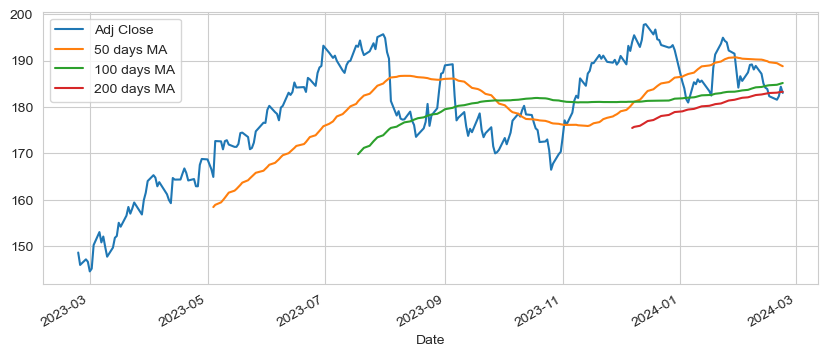

In [59]:
AAPL[['Adj Close','50 days MA','100 days MA','200 days MA']].plot(figsize=(10,4))

In [64]:
AAPL['Daily Returns'] = (AAPL['Adj Close']-AAPL['Open'])/AAPL['Open']*100

<Axes: xlabel='Date'>

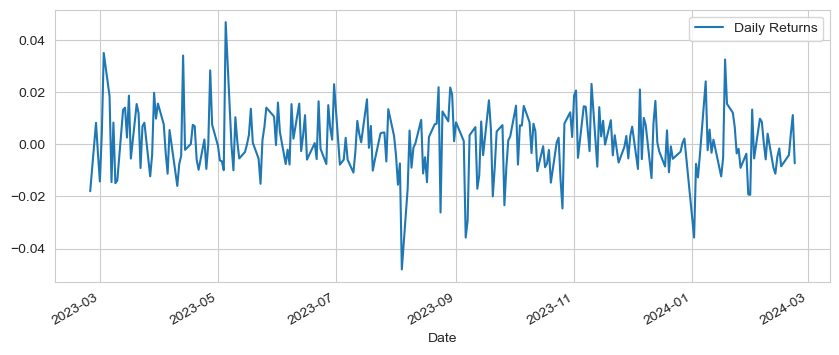

In [71]:
AAPL['Daily Returns'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Returns'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

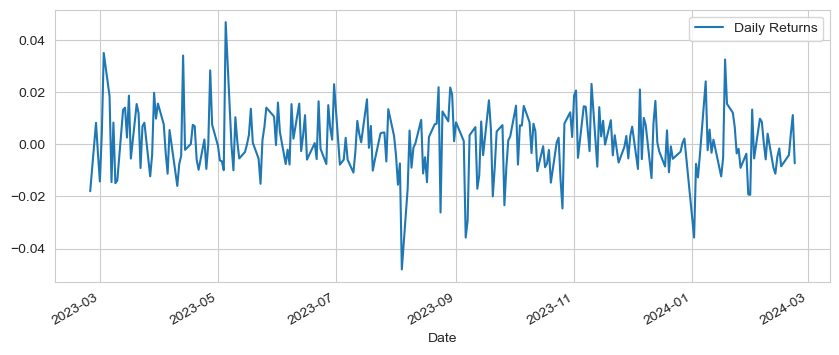

In [88]:
AAPL['Daily Returns'].plot(legend=True,figsize=(10,4))

C:\Users\cheta\AppData\Local\Temp\ipykernel_13328\466743364.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Returns'].dropna(),bins=100,color='purple')
C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Daily Returns', ylabel='Density'>

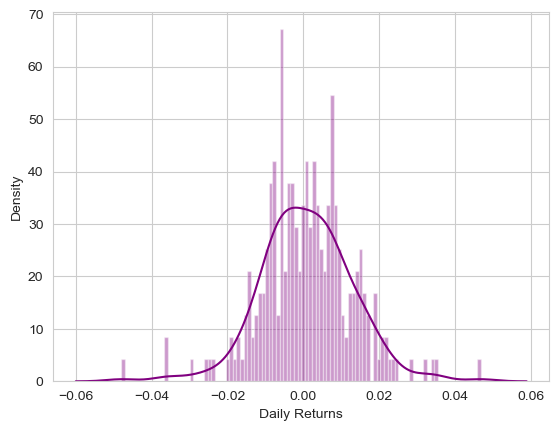

In [77]:
sns.distplot(AAPL['Daily Returns'].dropna(),bins=100,color='purple')

C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Daily Returns', ylabel='Count'>

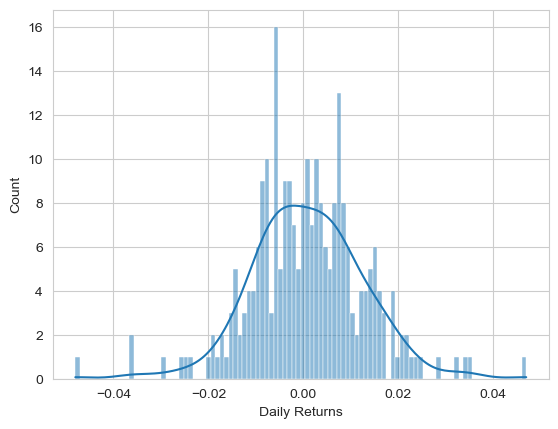

In [78]:
sns.histplot(AAPL['Daily Returns'].dropna(),bins=100,kde=True)

In [79]:
closing_df= yf.download(techlist,start,end)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [80]:
closing_df.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-02-23,148.606781,95.820000,91.070000,252.696045
2023-02-24,145.931061,93.500000,89.349998,247.191223
2023-02-27,147.134644,93.760002,90.099998,248.123581
2023-02-28,146.627350,94.230003,90.300003,247.389618
2023-03-01,144.538513,92.169998,90.510002,244.265244


In [81]:
tech_df=closing_df.pct_change()
tech_df.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-02-23,NaN,NaN,NaN,NaN
2023-02-24,-0.018005,-0.024212,-0.018887,-0.021784
2023-02-27,0.008248,0.002781,0.008394,0.003772
2023-02-28,-0.003448,0.005013,0.002220,-0.002958
2023-03-01,-0.014246,-0.021861,0.002326,-0.012629


<Axes: xlabel='Date'>

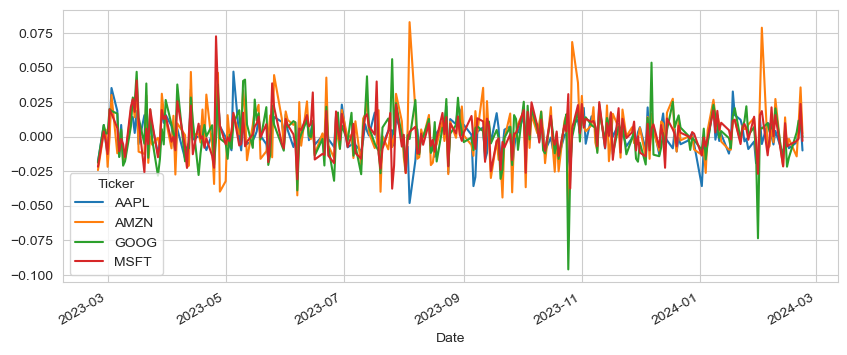

In [89]:
tech_df.plot(legend=True,figsize=(10,4))

C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


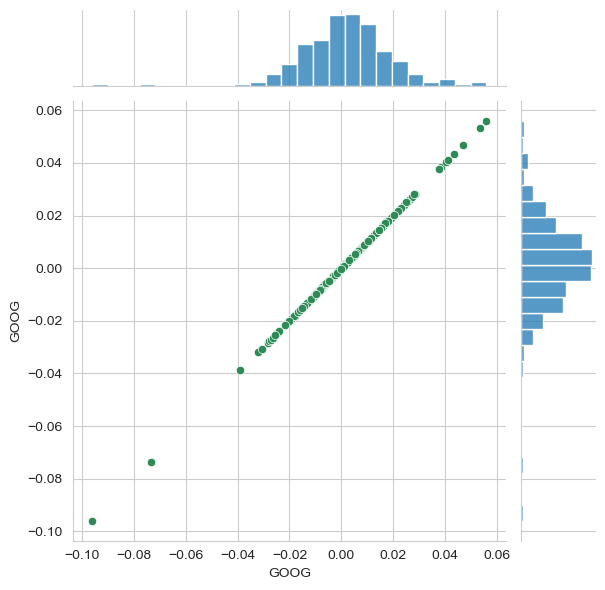

In [86]:
sns.jointplot(tech_df,x='GOOG',y='GOOG',kind='scatter',joint_kws={'color':'seagreen'})

C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


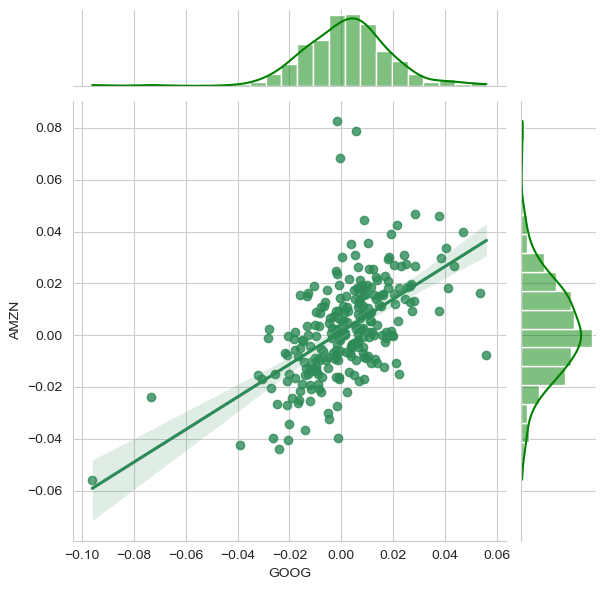

In [92]:
sns.jointplot(tech_df,x='GOOG',y='AMZN',kind='reg',joint_kws={'color':'seagreen'},marginal_kws={'color':'green'})

C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

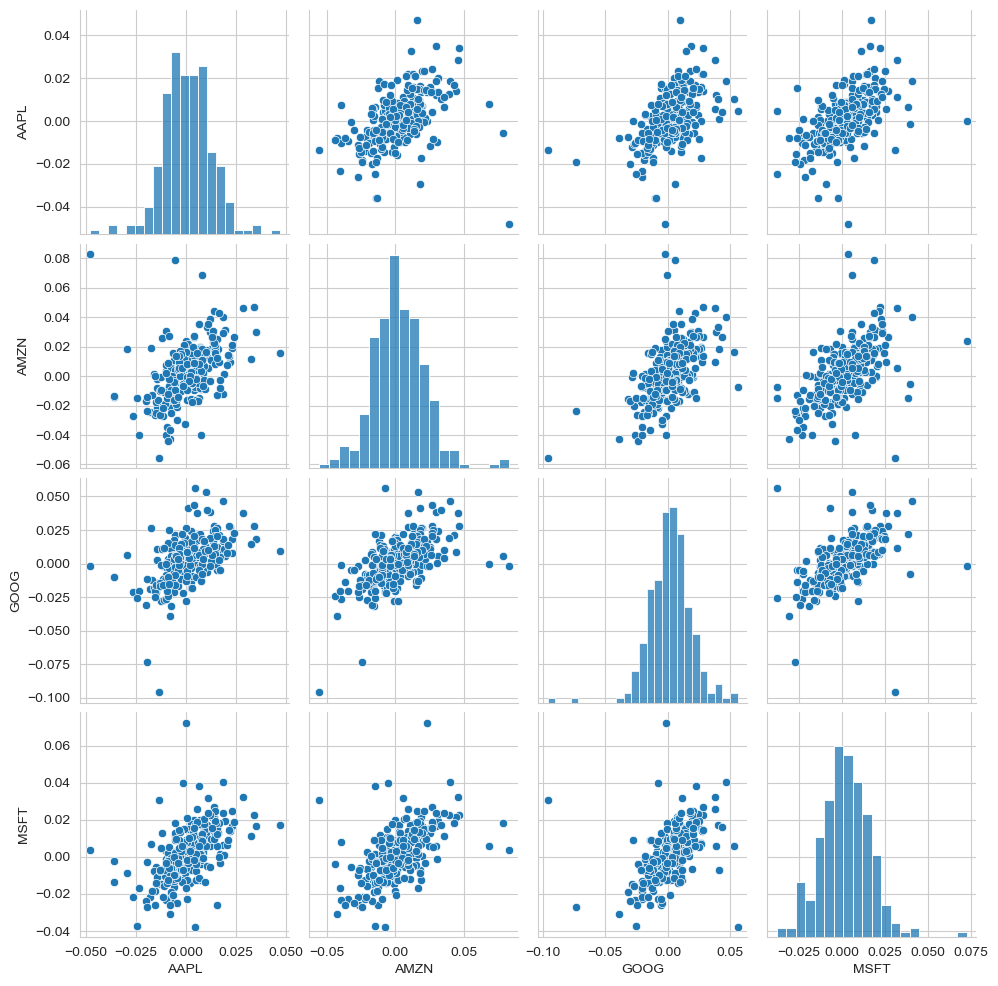

In [93]:
sns.pairplot(tech_df.dropna())

C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

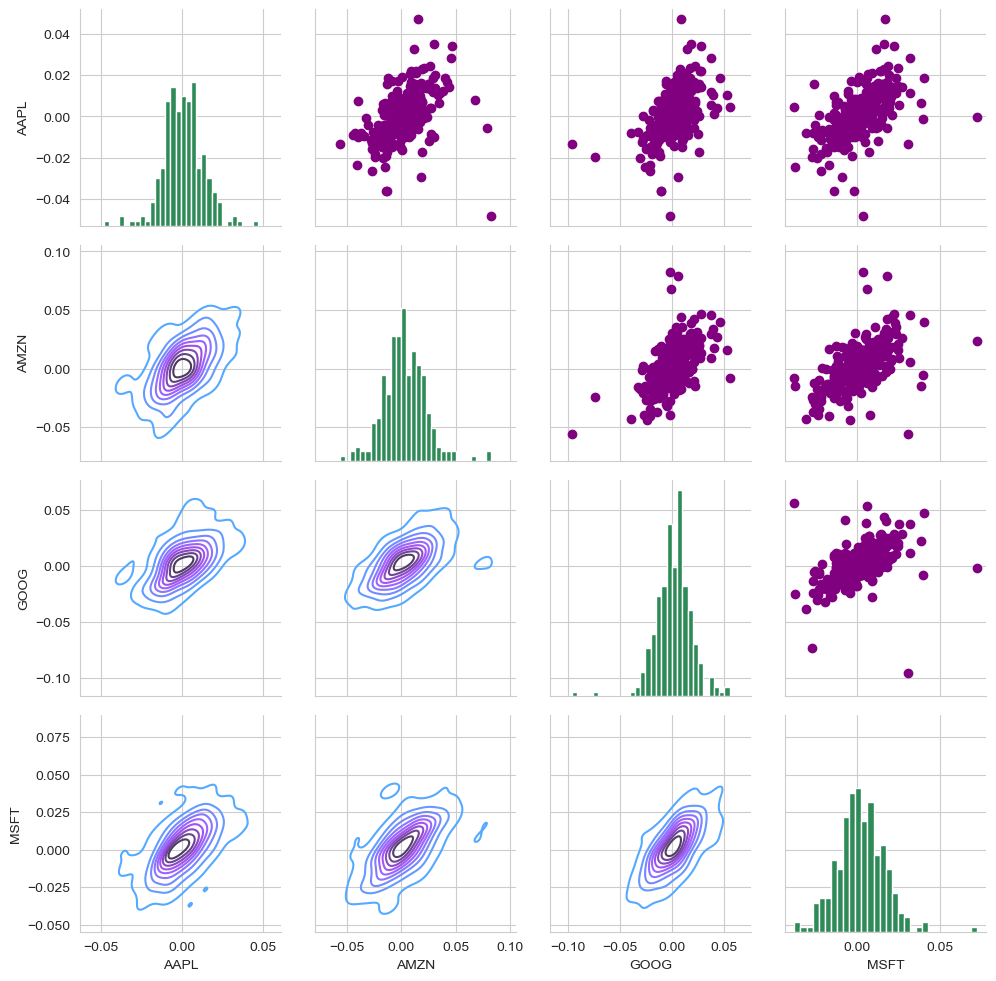

In [104]:
pd.option_context('mode.use_inf_as_na', True)
returnFig = sns.PairGrid(tech_df.dropna())
returnFig.map_upper(plt.scatter,color='purple')
returnFig.map_lower(sns.kdeplot,cmap='cool_d')
returnFig.map_diag(plt.hist,bins=30,color='seagreen')

C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

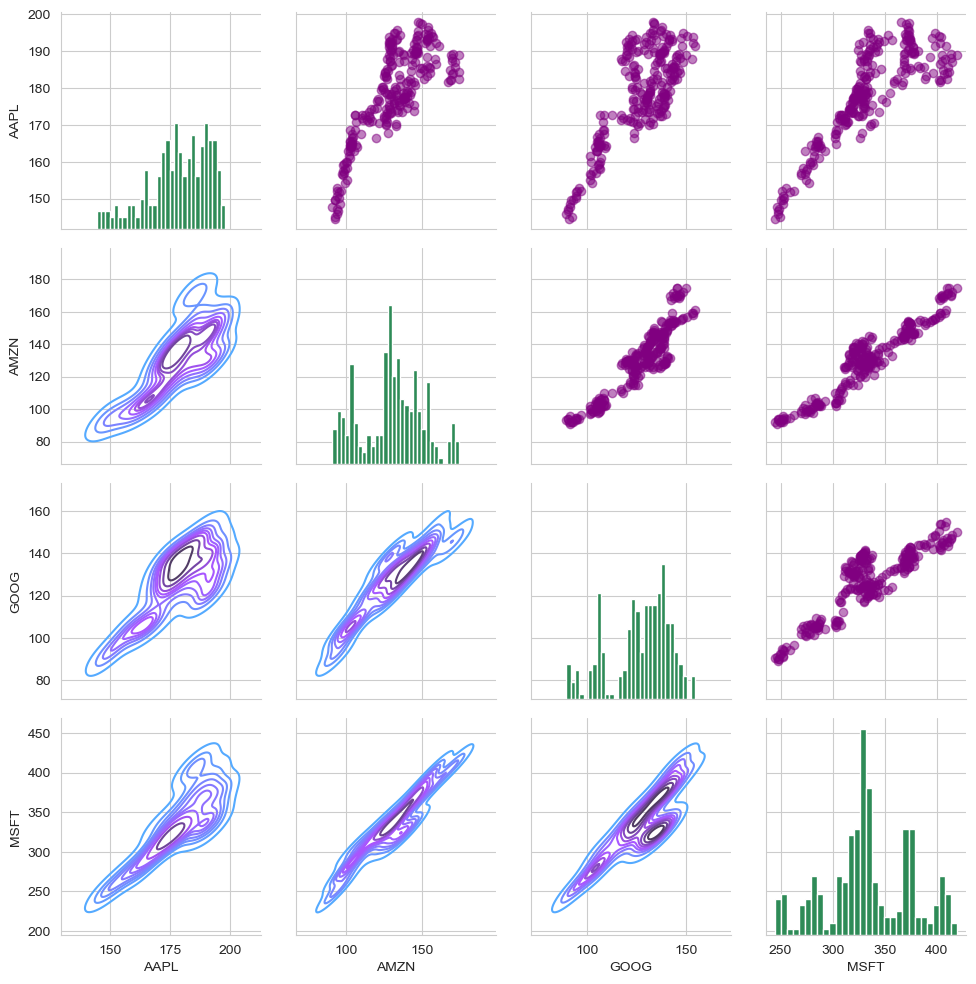

In [108]:
pd.option_context('mode.use_inf_as_na', True)
closingFig = sns.PairGrid(closing_df.dropna())
closingFig.map_upper(plt.scatter,color='purple',marker='o',alpha=0.5)
closingFig.map_lower(sns.kdeplot,cmap='cool_d')
closingFig.map_diag(plt.hist,bins=30,color='seagreen')

<Axes: xlabel='Ticker', ylabel='Ticker'>

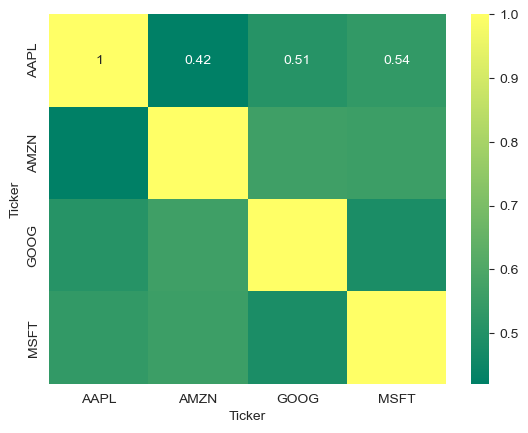

In [115]:
sns.heatmap(tech_df.corr(),cmap='summer',annot=True)

<Axes: xlabel='Ticker', ylabel='Ticker'>

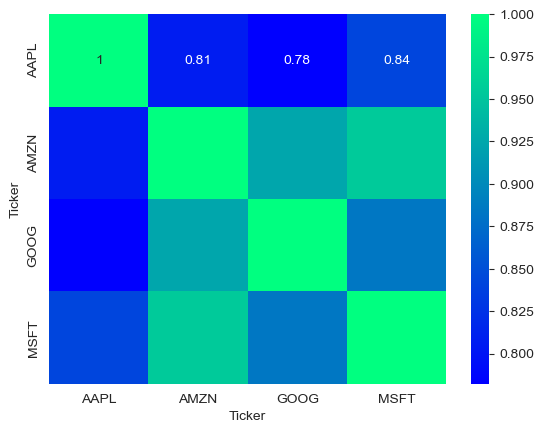

In [117]:
sns.heatmap(closing_df.corr(),cmap='winter',annot=True)

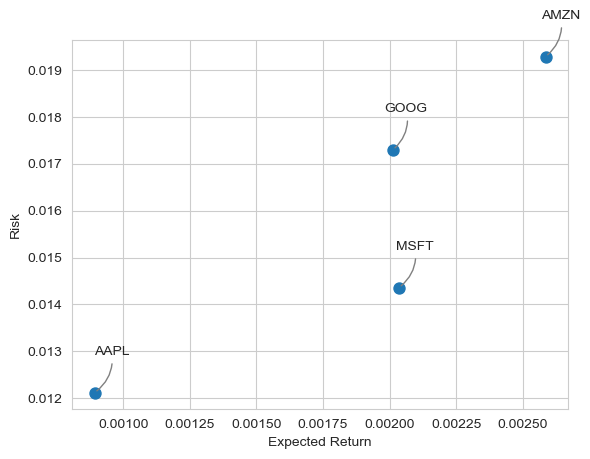

In [136]:
rets_df = tech_df.dropna()
area=np.pi*20
plt.scatter(x=rets_df.mean(),y=rets_df.std(),s=area)
plt.xlabel("Expected Return")
plt.ylabel("Risk")
for label,x,y in zip(rets_df.columns,rets_df.mean(),rets_df.std()):
            plt.annotate(label,xy=(x,y),xytext=(25,25),textcoords='offset points',ha='right',va='bottom',
             arrowprops = dict(color="0.5",arrowstyle='-',connectionstyle='arc3,rad=-0.3'))

C:\Users\cheta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Daily Returns', ylabel='Count'>

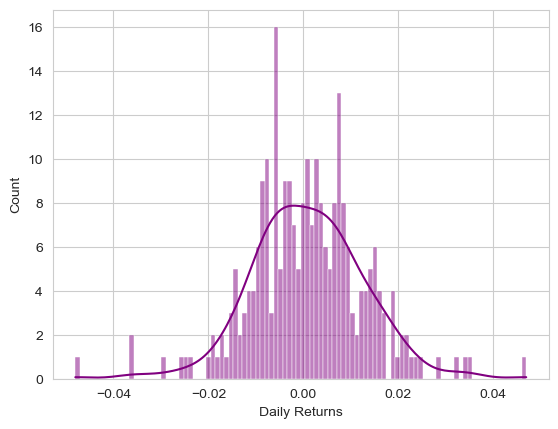

In [140]:
sns.histplot(AAPL['Daily Returns'],bins=100,kde=True,color='purple')

In [141]:
rets_df.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-02-24,-0.018005,-0.024212,-0.018887,-0.021784
2023-02-27,0.008248,0.002781,0.008394,0.003772
2023-02-28,-0.003448,0.005013,0.002220,-0.002958
2023-03-01,-0.014246,-0.021861,0.002326,-0.012629
2023-03-02,0.004129,-0.000434,0.019887,0.019653


In [143]:
var=rets_df['AAPL'].quantile(0.05)*100

In [145]:
var

-1.651654626375898

In [146]:
days = 365
dt = 1/days
mu = rets_df['AAPL'].mean()
sigma = rets_df['AAPL'].std()

In [155]:
def stock_monte_carlo(startPrice,days,mu,sigma):
    price=np.zeros(days)
    price[0]=startPrice
    shock=np.zeros(days)
    drift=np.zeros(days)

    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt

        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))

    return price
    

Text(0.5, 1.0, 'Monte Carlo Simulation for AAPL')

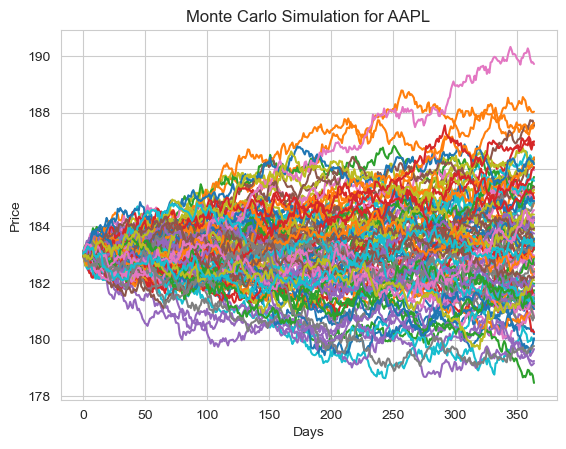

In [157]:
startPrice= AAPL.at['2024-02-23','Adj Close']
for x in range(100):
    plt.plot(stock_monte_carlo(startPrice,days,mu,sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Simulation for AAPL")

In [158]:
runs=10000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run]=stock_monte_carlo(startPrice,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'The Final Price Distribution for AAPL after 365 days')

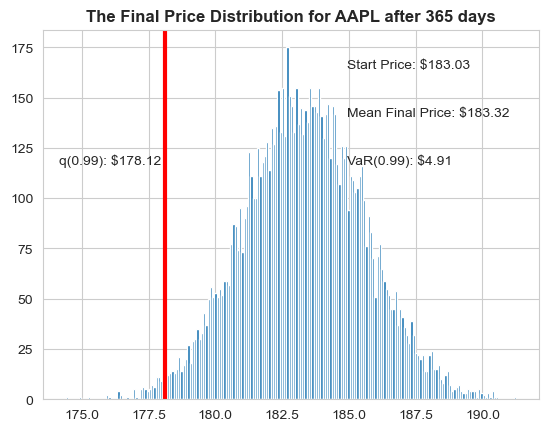

In [160]:
q=np.percentile(simulations,1)
plt.hist(simulations,bins=200)
plt.figtext(0.6,0.8,s= "Start Price: $%.2f"%startPrice)
plt.figtext(0.6,0.7,s= "Mean Final Price: $%.2f"%simulations.mean())
plt.figtext(0.6,0.6,s= "VaR(0.99): $%.2f"%(startPrice-q))
plt.figtext(0.15,0.6,s= "q(0.99): $%.2f"%q)
plt.axvline(x=q,linewidth=3,color='r')
plt.title(u"The Final Price Distribution for AAPL after %s days"%days,weight='bold')

